## Look at the big picture
1. Aims: Classify any new diamond in the three categories (Low, Mid and High grade).
2. Performance measure: confusion matrix



## Get the data

### Import the packages and the data

In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pathlib import Path
# Read the CSV file
df = pd.read_csv(
    '/Users/sean/OneDrive - connect.hku.hk/ECOM7126/Assignment/CustomerDataset.csv')

# extra code – code to save the figures as high-res PNGs for the book

IMAGES_PATH = Path() / "images" / "assignment3"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)


def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


### Take a Quick Look at the Data Structure

In [2]:
# get a glance of the data
df.head()

,CustomerID,Gender,Age,Income,SpendingScore
0,1,Female,29,499,85
1,2,Female,21,208,81
2,3,Female,27,300,48
3,4,Female,26,458,29
4,5,Male,57,221,4


In [3]:
# get the info of the data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     200 non-null    int64 
 1   Gender         200 non-null    object
 2   Age            200 non-null    int64 
 3   Income         200 non-null    int64 
 4   SpendingScore  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [23]:
df.isnull().sum()

CustomerID       0
Gender           0
Age              0
Income           0
SpendingScore    0
dtype: int64

In [4]:
df.describe()

,CustomerID,Age,Income,SpendingScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,39.075000,393.630000,50.475000
std,57.879185,14.042626,170.715441,25.765065
min,1.000000,16.000000,93.000000,1.000000
25%,50.750000,29.000000,270.500000,32.750000
50%,100.500000,36.500000,399.500000,50.000000
75%,150.250000,49.000000,501.250000,72.250000
max,200.000000,74.000000,896.000000,99.000000


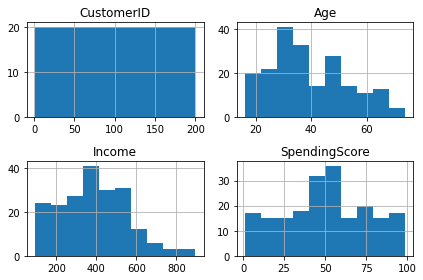

In [5]:
df.hist()
save_fig("hist")  

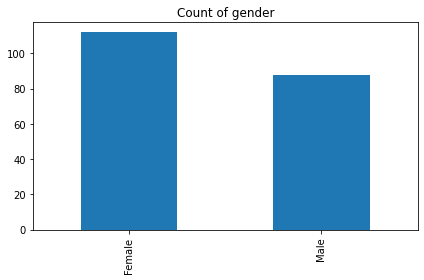

In [6]:
df["Gender"].value_counts().plot(kind='bar')
plt.title('Count of gender')
save_fig("Count of gender")  

### Create Test set

In [8]:
# Random sampling
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)


## Prepare the data for ML algotithms


In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer

num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler())
cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))
preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),
)





In [16]:
# unsupervised learning
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans = make_pipeline(preprocessing, KMeans(n_clusters=2))

# Fit the KMeans model to the data
kmeans.fit(train_set)
# Get the cluster labels for each data point
labels = kmeans.predict(train_set)

# Get the cluster centers
centers = kmeans.named_steps['kmeans'].cluster_centers_





/Users/sean/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


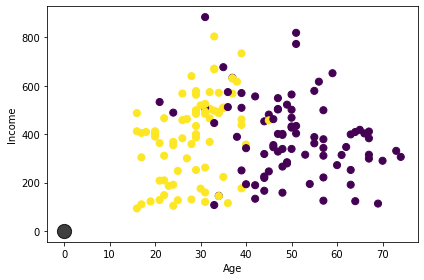

In [22]:
# Plot the cluster centers and the data points on a 2D plane
plt.scatter(train_set['Age'], train_set['Income'], c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
xlabel = 'Age'
ylabel = 'Income'
plt.xlabel(xlabel)
plt.ylabel(ylabel)
save_fig("kmeans")


In [26]:
# Evaluate the KMeans model
silhouette_score(train_set, labels)


ValueError: could not convert string to float: 'Male'